# Practice Session 09: Spectral graph analysis

<font size="3" color="blue">Nil Tomàs Plans, U214575, 18/11/2023</font>

In [135]:
# LEAVE AS-IS

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg

# Disable warnings about future changes
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. Compute graph Laplacian

In [136]:
# LEAVE AS-IS

INPUT_GRAPH_FILENAME = "starwars.graphml"

# Read the graph in GraphML format
sw_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
sw_relabeled = nx.relabel.relabel_nodes(sw_in, dict(sw_in.nodes(data='name')))

# Convert the graph to undirected
sw = sw_relabeled.to_undirected()

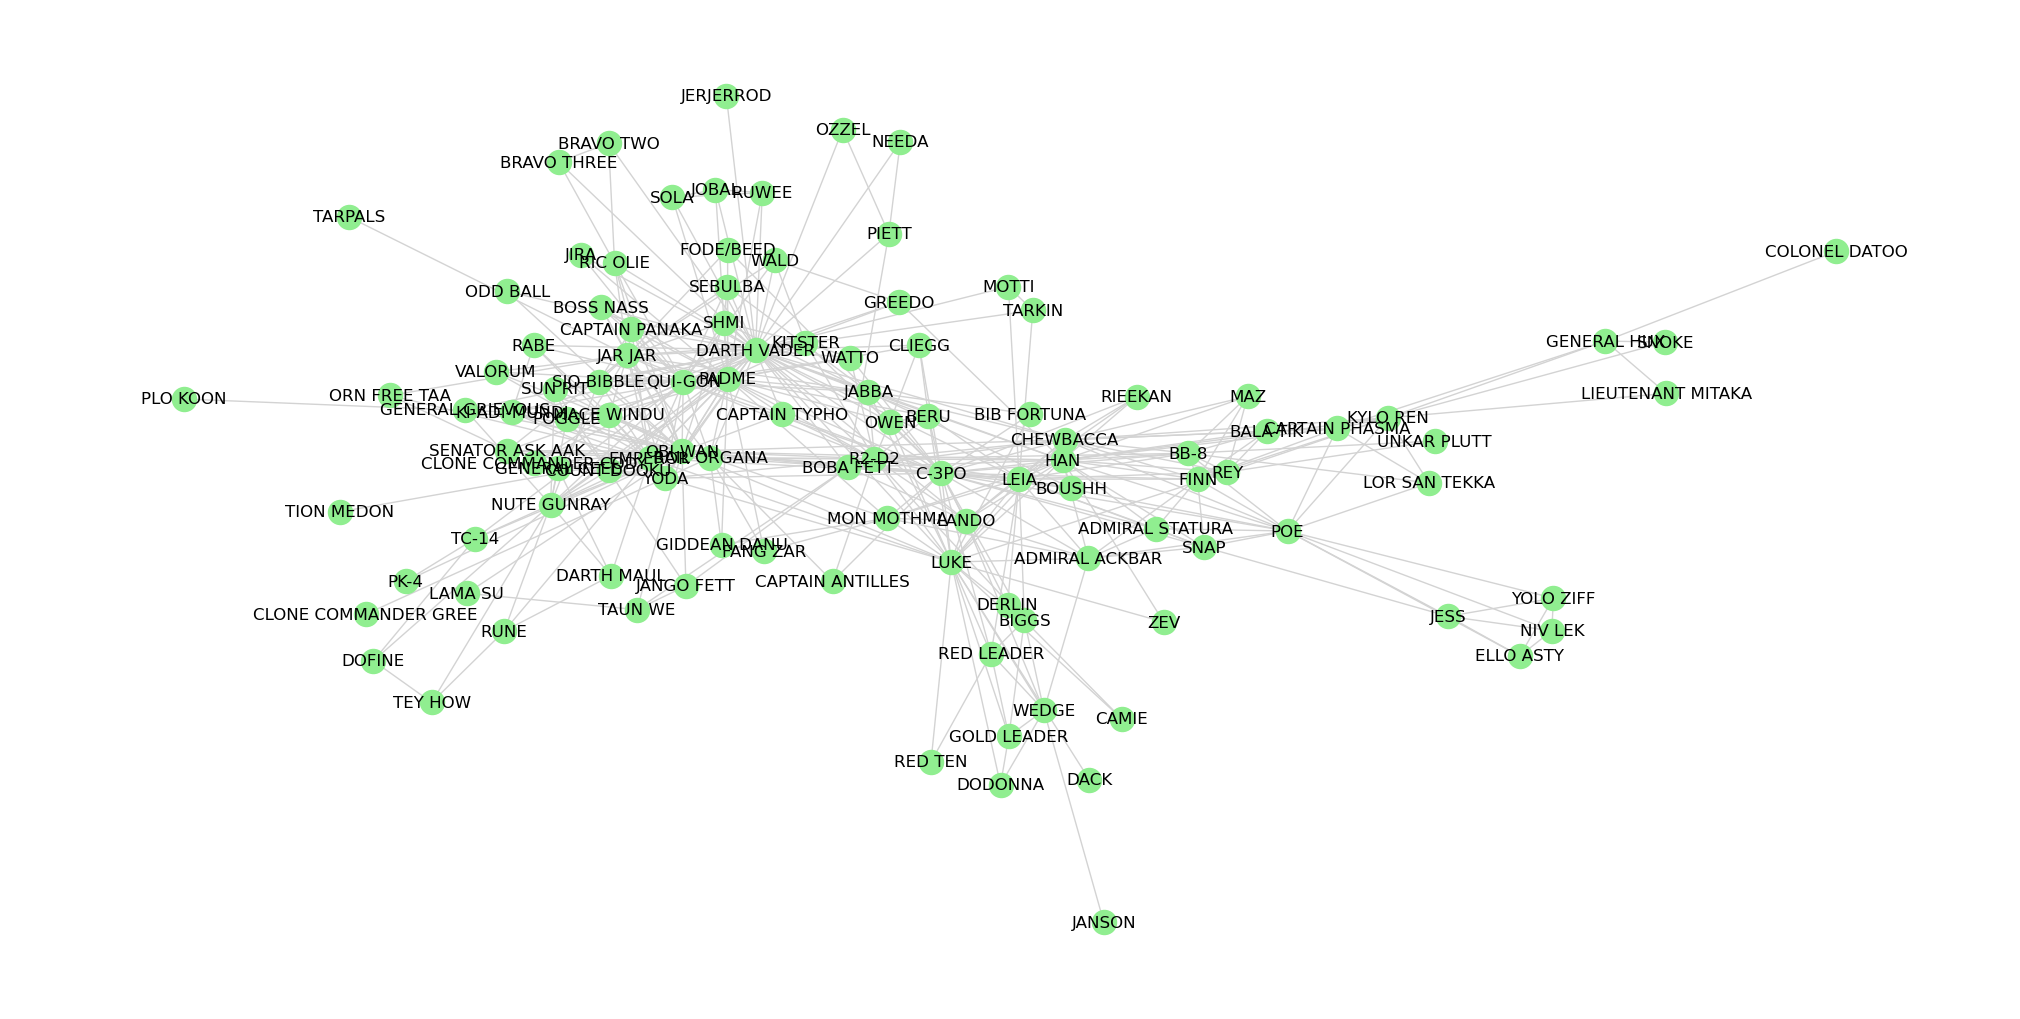

In [137]:
# LEAVE AS-IS

plt.figure(figsize=(20, 10))
nx.draw_spring(sw, with_labels=True, node_color='lightgreen', edge_color='lightgrey')
plt.show()

In [138]:
#code for diagonal_degree_matrix, adjacency_matrix, and laplacian
def diagonal_degree_matrix(g):
    nodes = list(g.nodes())#llista de nodes
    Diagonal = sparse.lil_matrix((len(nodes), len(nodes)))#creo una diagonal plena de 0s
    
    for i, node in enumerate(nodes):#omplo la diagonal amb els degree de cada node
        grau = g.degree[node]
        Diagonal[i, i] = grau
        
    return Diagonal


def adjacency_matrix(g):
    nodes = list(g.nodes())#llista de nodes
    Adjacent = sparse.lil_matrix((len(nodes), len(nodes)))#creo una matriu adjacent sense valors


    for i, node in enumerate(nodes):#omplo la matriu adjacent amb els degree de cada node
        for j, neighbor in enumerate(nodes):
            if g.has_edge(node, neighbor):
                Adjacent[i, j] = 1

    return Adjacent


def laplacian(g):
    Diagonal= diagonal_degree_matrix(g)#calculo el grau de la diagonal de la matriu
    
    # Compute the adjacency matrix
    Adj = adjacency_matrix(g)

    # calculo la Laplacian matrix: Laplacia = Diagonal - Adjacent
    Laplacia = Diagonal - Adj

    return Laplacia

In [139]:
# LEAVE AS-IS

def test_equality_matrices(A, B):
    
    # Check equality element-wise using dense matrices comparison
    return np.array_equal(A.todense(), B.todense())

# Test adjacency matrix

A = adjacency_matrix(sw)
Anx = nx.adjacency_matrix(sw)

if test_equality_matrices(A, Anx):
    print("OK - Adjacency matrix correctly generated")
else:
    print("FAIL - Your adjacency matrix is not equal to the one generated by NetworkX")

# Test Laplacian matrix

L = laplacian(sw)
Lnx = nx.laplacian_matrix(sw)
                
if test_equality_matrices(L, Lnx):
    print("OK - Laplacian matrix correctly generated")
else:
    print("FAIL - Your Laplacian matrix is not equal to the one generated by NetworkX")

OK - Adjacency matrix correctly generated
OK - Laplacian matrix correctly generated


# 2. Compute eigenvectors to layout a lattice graph

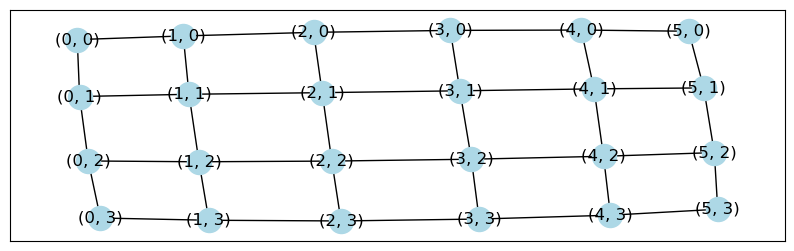

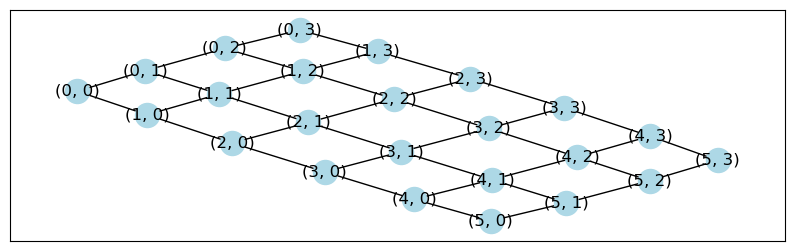

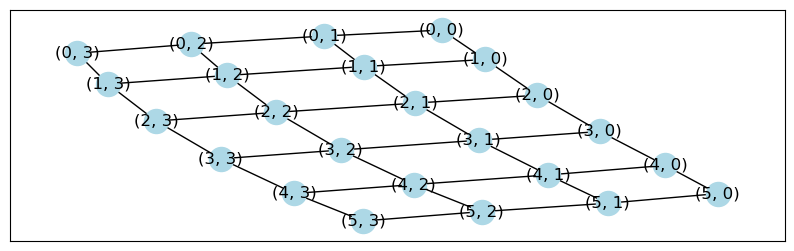

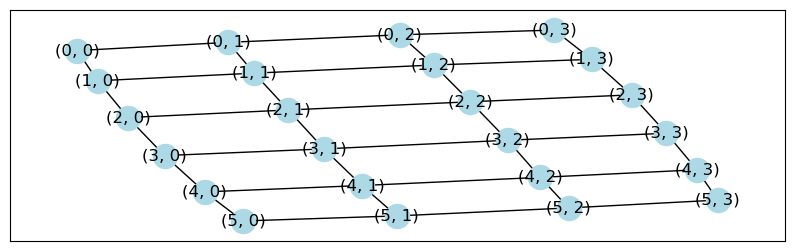

In [140]:
# LEAVE AS-IS

Ggrid = nx.grid_2d_graph(6,4)

for i in range(4):
    plt.figure(figsize=(10, 3))
    nx.draw_networkx(Ggrid, with_labels=True, node_color='lightblue')
    plt.show()
    
#a vegades els lattice graphs surten una mica deformats, però altres vegades surt correctament. Per tant, es possible que quan l'executis surtin algun node deformat 

# 2.1. Obtain the spectrum of the graph

In [141]:
# LEAVE AS-IS

# Obtain three eigenvalues and eigenvectors
eigenvalues, eigenvectors = linalg.eigsh(laplacian(Ggrid), k=3, which='SM')

#  The three eigenvectors
first_eigenvector = eigenvectors[:,0]
X_positions = eigenvectors[:,1]
Y_positions = eigenvectors[:,2]

# The first eigenvector should be constant
print("First eigenvector (should be constant):")
print(first_eigenvector)
print()

# Print coordinates
print("Second (X positions) and third (Y positions) eigenvector:")
print(X_positions)
print(Y_positions)

First eigenvector (should be constant):
[-0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415
 -0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415
 -0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415
 -0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415 -0.20412415]

Second (X positions) and third (Y positions) eigenvector:
[ 0.27883877  0.27883877  0.27883877  0.27883877  0.20412415  0.20412415
  0.20412415  0.20412415  0.07471462  0.07471462  0.07471462  0.07471462
 -0.07471462 -0.07471462 -0.07471462 -0.07471462 -0.20412415 -0.20412415
 -0.20412415 -0.20412415 -0.27883877 -0.27883877 -0.27883877 -0.27883877]
[ 0.26670105  0.11047119 -0.11047119 -0.26670105  0.26670105  0.11047119
 -0.11047119 -0.26670105  0.26670105  0.11047119 -0.11047119 -0.26670105
  0.26670105  0.11047119 -0.11047119 -0.26670105  0.26670105  0.11047119
 -0.11047119 -0.26670105  0.26670105  0.11047119 -0.11047119 -0.26670105]


Coordinates are difficult to interpret so we should look at them visually. 

Create a function `spectral_projection()` that returns the X and Y coordinates corresponding to the **spectral graph projection** of a graph, and a function `draw_fixed_positions()` which displays this using [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and the following template:


```python
def spectral_projection(graph, node_color='lightblue'):
     
    # Obtain positions X, Y
    # TO-DO: ADD YOUR CODE HERE
    return X, Y
    
def draw_graph_fixed_positions(graph, X_positions, Y_positions, title, xlabel, ylabel,
                               width=20, height=6, 
                               font_color='white', node_color='black'):
    
    # Create the figure of the given width and height,
    # then add title, xlabel, ylabel
    # TO-DO: ADD YOUR CODE HERE
    
    # Create the dictionary with positions
    pos = {}
    # TO-DO: ADD YOUR CODE HERE
    
    # Draw graph
    _ = nx.draw_networkx(graph, pos=pos, with_labels=True, node_color=node_color, font_color=font_color)
```

*Tip:* the attribute `pos` that networkx expects is a dictionary where each key is a node, and each value is a tuple containing its coordinates. For instance, if the first node should be positioned at *x=1* and *y=3*, we would do:

```python
    nodes = graph.nodes()
    pos[nodes[0]] = (1,3)
```

To create this dictionary one possibility is to iterate from `0` to `len(nodes)`.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [142]:
def spectral_projection(graph, node_color='lightblue'):
    # Obtain three eigenvalues and eigenvectors
    eigenvalues, eigenvectors = linalg.eigsh(laplacian(graph), k=3, which='SM')
    
    # Extract the second and third eigenvectors
    X = eigenvectors[:, 1]
    Y= eigenvectors[:, 2]

    return X, Y

def draw_graph_fixed_positions(graph, X_positions, Y_positions, title, xlabel, ylabel,
                               width=20, height=6, 
                               font_color='white', node_color='black'):
    # Creem el marge donats el width i el height
    plt.figure(figsize=(width, height))
    
    # afegeixo title, xlabel, ylabel
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Create the dictionary with positions
    pos = {}
    
    for node, x, y in zip(graph.nodes(), X_positions, Y_positions):#omplo el diccionari pos amb les posicions dels nodes
        pos[node] = (x, y)
    
    # dibuixo el graf
    nx.draw_networkx(graph, pos=pos, with_labels=True, node_color=node_color, font_color=font_color)
    
    plt.show()#printem el graf

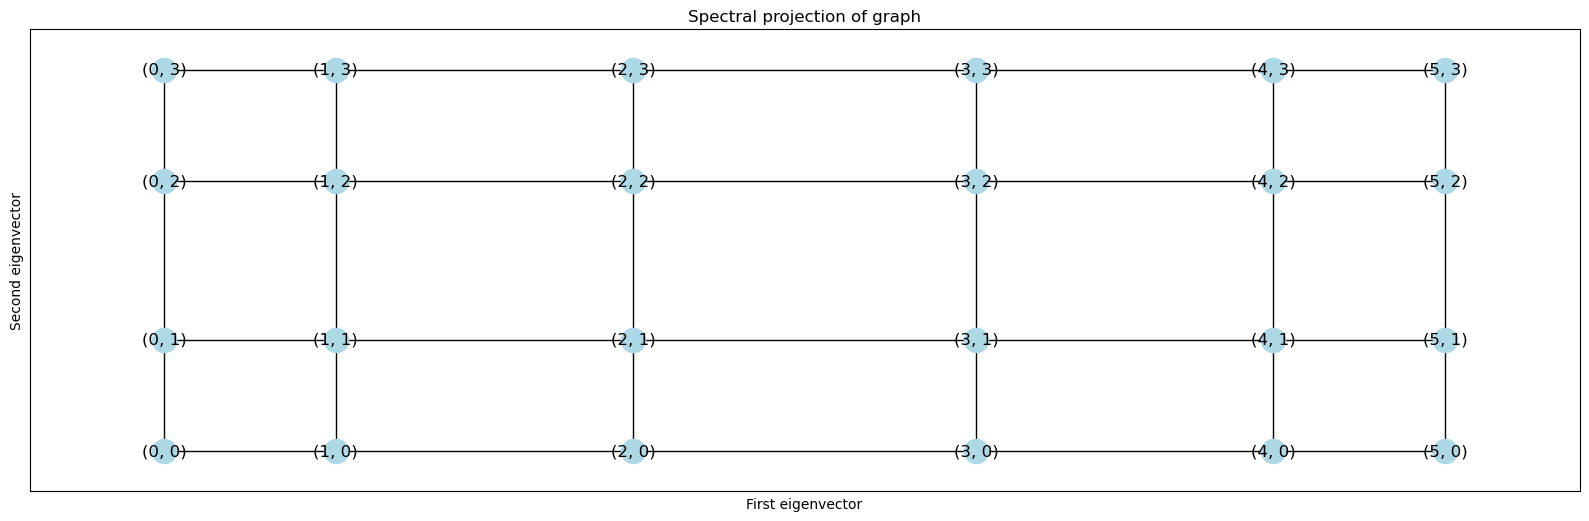

In [143]:
# LEAVE AS-IS

def draw_spectral_projection(g, width=20, height=6, font_color='white', node_color='black'):
    X, Y = spectral_projection(g)
    _ = draw_graph_fixed_positions(g, X, Y, node_color=node_color, font_color=font_color,
                               width=width, height=height,
                               title="Spectral projection of graph", 
                               xlabel="First eigenvector", ylabel="Second eigenvector")
    
draw_spectral_projection(Ggrid, font_color='black', node_color='lightblue')



In [144]:
#voldria comenter que el gràfic a vegades és grafica bé i altres vegades que no. És a dir que a vegades les coordenades dels nodes coincideixen amb els noms dels nodes,
#però hi ha altres vegades que s'intercanvien les posicions
#Ho comento per a què ho tingueu en compte

<font size="+1" color="blue">En el gràfic de la projecció espectral del graf puc veure que la forma representada és un rectangle. A més els nodes estan posicionats de manera que si tracem un eix X i un de Y, els diferents nodes estan situats aproximadament en el punt de la gràfica que els hi correspon. És a dir, que al punt (0,0) trobarem el node (0,0) i per exemple al punt (4,2) trobarem aquest mateix node, que s'ha desplaçat 4 unitats en l'eix X i 2 en l'eix Y respecte el (0,0). Els punts en l'eix X estan desplaçats, possiblement degut a què l'espai que hem creat per a generar el gràfic era rectangle i no quadrat, i això hauria pogut portar a aquest desplaçament dels nodes.</font>

# 3. Spectral graph clustering

## 3.1. Clustering of graph generated using the stochastic block model

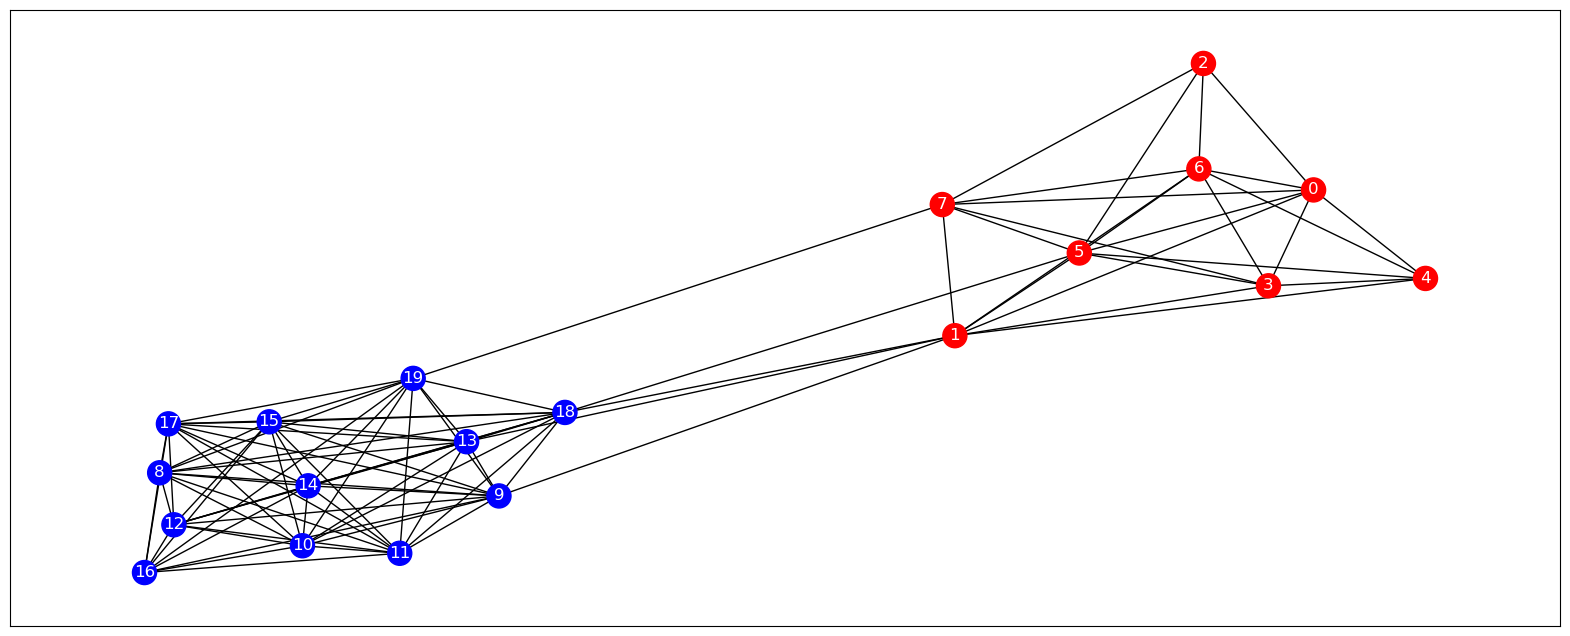

In [145]:
# LEAVE AS-IS

n1 = 8
n2 = 12

P = [
    [0.80, 0.07], # Connecting community 1 to itself, or community 1 to community 2
    [0.07, 0.95]  # Connecting community 2 to community 1, or community 2 to itself
] 
Gblock = nx.stochastic_block_model([n1, n2], P)
assert nx.is_connected(Gblock), "Repeat: generated graph is not connected"

# Draw graph
plt.figure(figsize=(20, 8))
color_vec = ["red" for i in range(n1)] + ["blue" for i in range(n2)] 
nx.draw_networkx(Gblock, with_labels=True, node_color=color_vec, font_color='white')


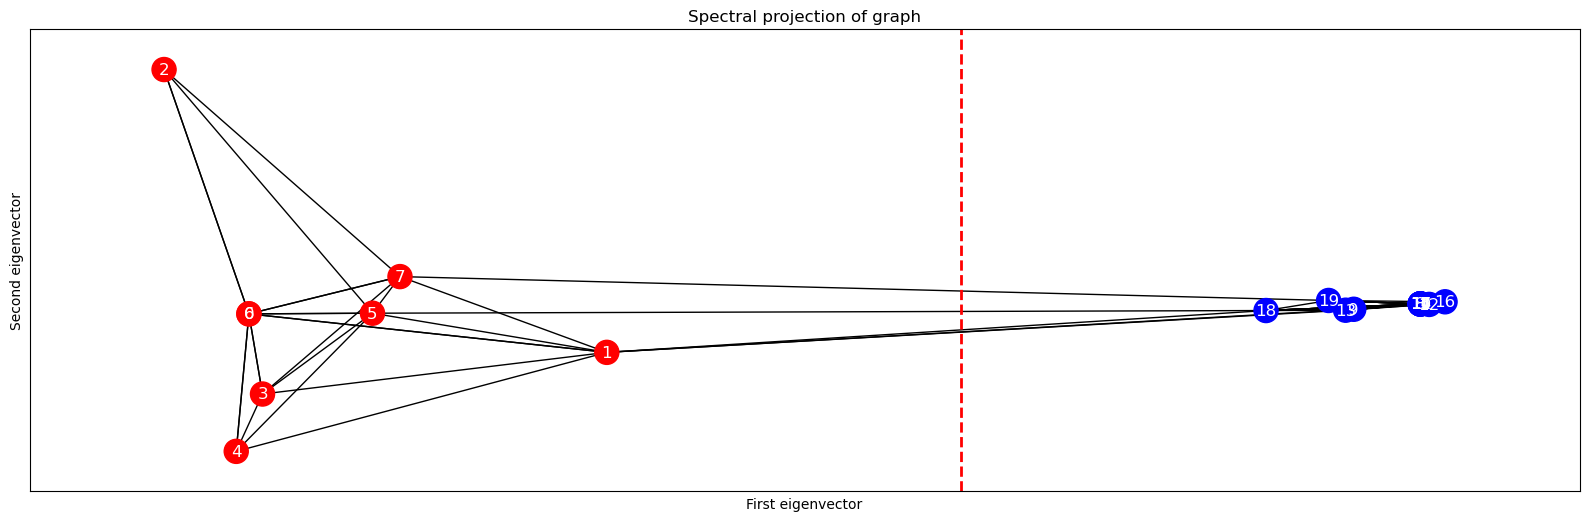

In [146]:
#torno a cridar la funció per a afegir-li una línia que serà la que sigui l'engarregada de dibuixar la línia a x=0
################################################################################################
def draw_graph_fixed_positions(graph, X_positions, Y_positions, title, xlabel, ylabel,
                               width=20, height=6, 
                               font_color='white', node_color='black'):
    # Creem el marge donats el width i el height
    plt.figure(figsize=(width, height))
    
    # afegeixo title, xlabel, ylabel
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Create the dictionary with positions
    pos = {}
    
    for node, x, y in zip(graph.nodes(), X_positions, Y_positions):#omplo el diccionari pos amb les posicions dels nodes
        pos[node] = (x, y)
    
    # dibuixo el graf
    nx.draw_networkx(graph, pos=pos, with_labels=True, node_color=node_color, font_color=font_color)
    
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)#línia que he afegit
    plt.show()#printem el graf
################################################################################################
#codi de l'exercici
draw_spectral_projection(Gblock, font_color='white', node_color=color_vec)

################################################################################################
#torno a reiniciar la funció amb les seves funcions inicials
def draw_graph_fixed_positions(graph, X_positions, Y_positions, title, xlabel, ylabel,
                               width=20, height=6, 
                               font_color='white', node_color='black'):
    # Creem el marge donats el width i el height
    plt.figure(figsize=(width, height))
    
    # afegeixo title, xlabel, ylabel
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Create the dictionary with positions
    pos = {}
    
    for node, x, y in zip(graph.nodes(), X_positions, Y_positions):#omplo el diccionari pos amb les posicions dels nodes
        pos[node] = (x, y)
    
    # dibuixo el graf
    nx.draw_networkx(graph, pos=pos, with_labels=True, node_color=node_color, font_color=font_color)
    
    plt.show()#printem el graf
################################################################################################

<font size="+1" color="blue"> Puc veure que el graf està dividit en dues comunitats, força separades entre elles, i és aquí per on talla la línia discontínua a x=0. Destaco que cada cop que fem córrer el programa, aquest fa canviar el graf i la línia a x=0</font>

In [147]:
# LEAVE AS-IS

def generate_connected_block_model_graph(n1, n2, P):
    while True:
        graph = nx.stochastic_block_model([n1, n2], P)

        if nx.is_connected(graph):
            print("Success -- generated graph is connected")
            break
        else:
            print("Not connected, generating again")
            
    return graph

def draw_block_model_graph_and_projection(graph, n1, n2, width=20, height=6,
                                          color1="red", color2="blue", font_color="white"):
    # Create figure
    plt.figure(figsize=(20, 8))
    
    # Create list of colors
    color_vec = [color1 for i in range(n1)] + [color2 for i in range(n2)] 
    
    # Draw spectral projections
    draw_spectral_projection(graph, width=width, height=height, node_color=color_vec, font_color=font_color)
    
    # Add a vertical line at x=0
    _ = plt.axvline(0.0, color='blue')

Success -- generated graph is connected


<Figure size 2000x800 with 0 Axes>

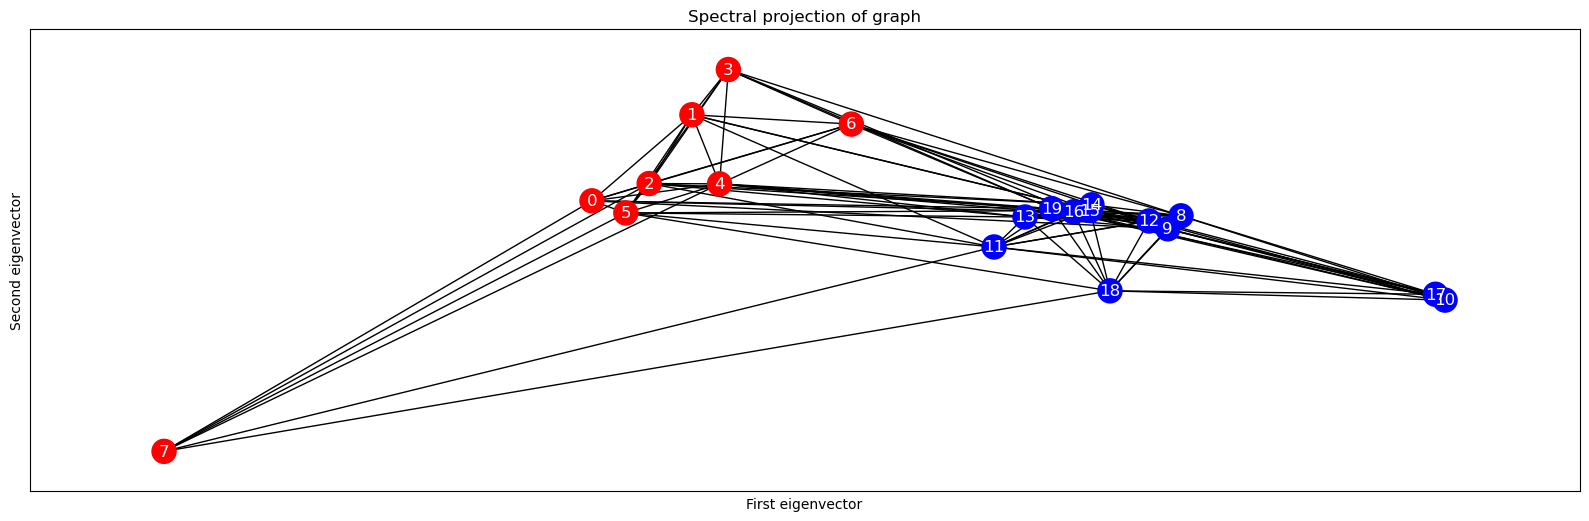

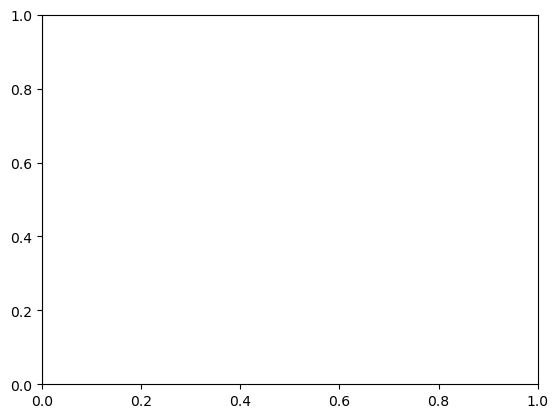

In [125]:
def create_Gblock1():#code to create Gblock1 and to draw it. The spectral graph clustering by setting threshold X=0 should have at one node in the "wrong" community.
    n1 = 8
    n2 = 12

    # Modify P to create less obvious community structure
    P_block1 = [#com que volem que hi hagi una probabilitat al voltant d'1 error, posem una probabilitat molt alta
        [0.80, 0.2],  #son les probabilitats de conectar un node de la comunitat 1 a ell mateix, o a un de la comunitat 2
        [0.2, 0.80]   #son les probabilitats de conectar un node de la comunitat 2 a un de la comunitat 1  o a ell mateix
    ]

    Gblock1 = generate_connected_block_model_graph(n1, n2, P_block1)
    return Gblock1

Gblock1 = create_Gblock1()#assignem a la variable el graf de la funció
draw_block_model_graph_and_projection(Gblock1, n1=8, n2=12)#dibuixem el graf

Success -- generated graph is connected


<Figure size 2000x800 with 0 Axes>

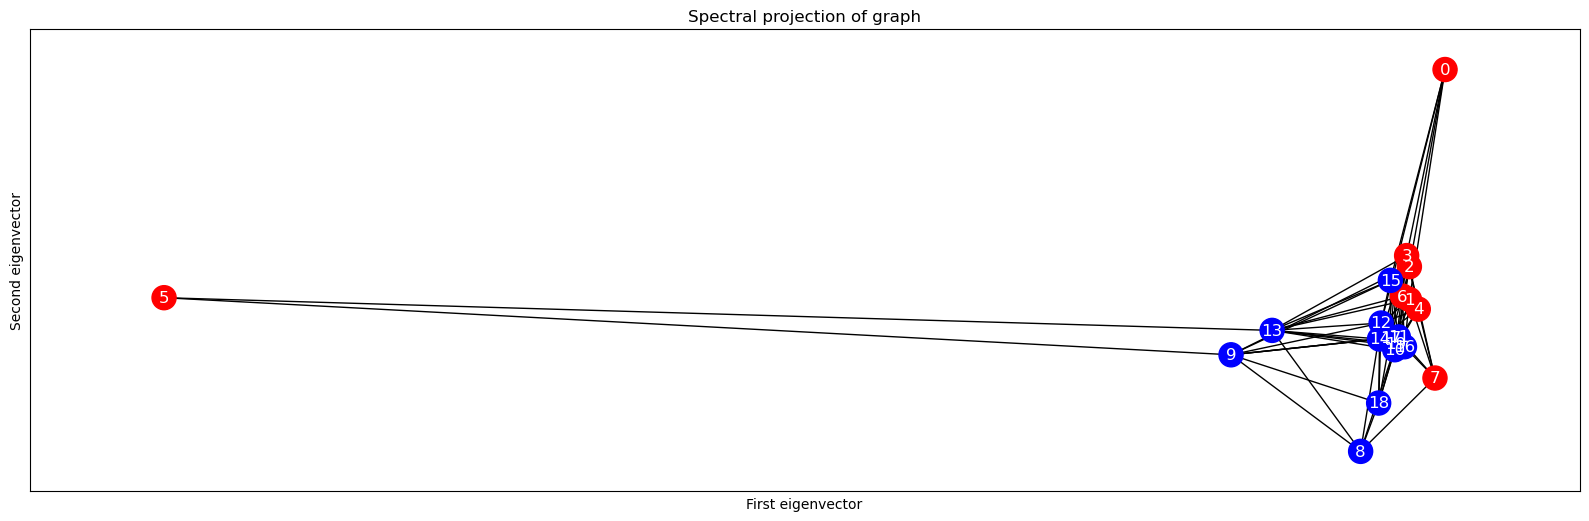

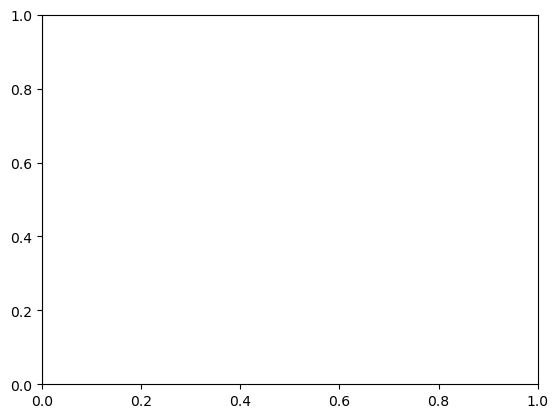

In [148]:
def create_Gblock2():#code to create `Gblock2` and to draw it. The spectral graph clustering by setting threshold X=0 should have at multiple nodes in the "wrong" community.
    n1 = 8
    n2 = 12


    P_block2 = [#com que volem que hi hagin varis errors, baixem la probabilitat al voltant del 50% a cadascun al voltant d'1 error, posem una probabilitat molt alta
        [0.55, 0.45],  #son les probabilitats de conectar un node de la comunitat 1 a ell mateix, o a un de la comunitat 2
        [0.45, 0.55]   #son les probabilitats de conectar un node de la comunitat 2 a un de la comunitat 1  o a ell mateix
    ]

    Gblock2 = generate_connected_block_model_graph(n1, n2, P_block2)
    return Gblock2

Gblock2 = create_Gblock2()#assignem a la variable el graf de la funció
draw_block_model_graph_and_projection(Gblock2, n1=8, n2=12)#dibuixem el graf

<font size="+1" color="blue">Puc observar que en el primer graf les dos comunitats es mantenen mig separades amb uns quants nodes que estan junts degut a aquest error que em creat, mentres que al segon les dues comunitats estan pràcticament barrejades</font>

## 3.3. Clustering of the Game of Thrones graph

In [149]:
# LEAVE AS-IS

# Load graph
# (If there is an error of 'long' attribute data type,
#  you can change 'long' to 'string' in the "got.graphml" file.)
got = nx.read_graphml("got.graphml")

# Make undirected, removing multi-edges
got = nx.Graph(got)

# Relabel
got = nx.relabel_nodes(got, nx.get_node_attributes(got, 'name'))


In [150]:
# LEAVE AS-IS

def extract_by_attribute_values(graph, attribute_name, attribute_values):
    
    nodes_to_keep = []
    
    for node, value in nx.get_node_attributes(graph, attribute_name).items():
        if value in attribute_values:
            nodes_to_keep.append(node)
            
    return nodes_to_keep

In [156]:

# Create subgraph got_selected
selected_houses = ['House Stark', 'House Targaryen']
selected_nodes = extract_by_attribute_values(got, 'house', selected_houses)
got_selected = got.subgraph(selected_nodes)

#verifico el numero de nodes del subgraf anb la llargada 
num_nodes_selected = len(got_selected.nodes)
print(f"The subgraph de Joc de Trons te {num_nodes_selected} nodes.")

The subgraph de Joc de Trons te 15 nodes.


In [157]:
# LEAVE AS-IS

colors = []
house_of = nx.get_node_attributes(got_selected, 'house')

node_sequence = list(got_selected.nodes())
for i in range(len(node_sequence)):
    node = node_sequence[i]
    if house_of[node] == 'House Stark':
        colors.append('orange')
    elif house_of[node] == 'House Targaryen':
        colors.append('lightgreen')
    else:
        assert False

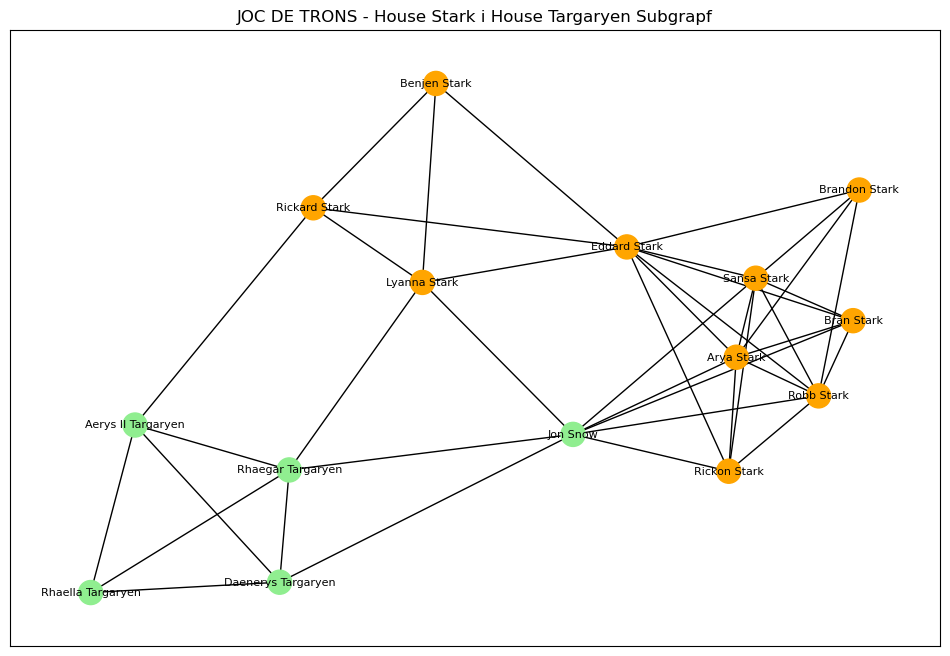

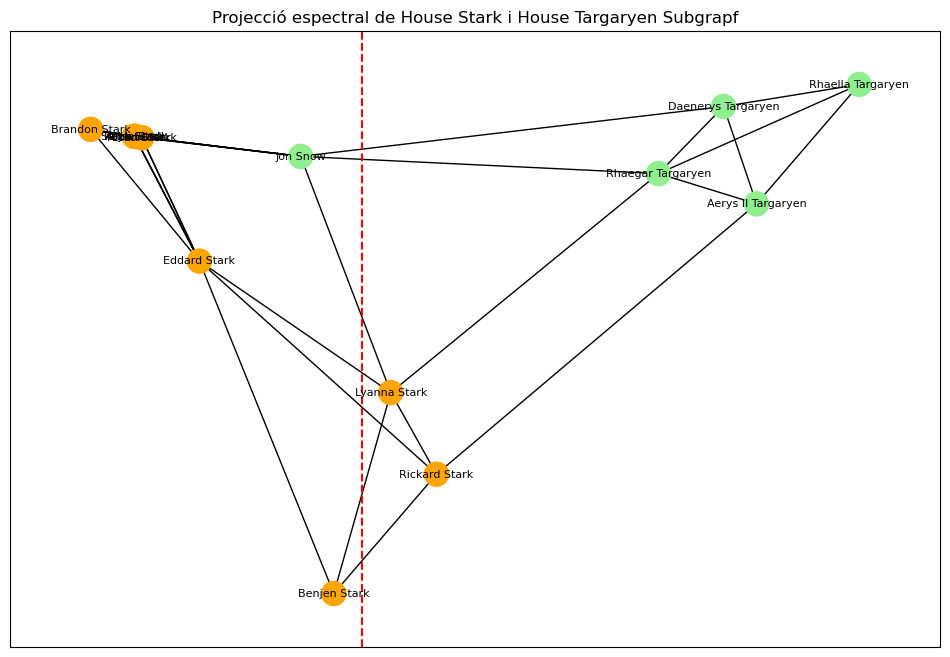

In [163]:
# Dibuixem el got selected graf
plt.figure(figsize=(12, 8))
plt.title("JOC DE TRONS - House Stark i House Targaryen Subgrapf")#títol del graf
nx.draw_networkx(got_selected, pos=nx.spring_layout(got_selected), with_labels=True, font_size=8, node_color=colors)
plt.show()#printem el graf 

# Dibuixo la projecció espectral
plt.figure(figsize=(12, 8))
plt.title("Projecció espectral de House Stark i House Targaryen Subgrapf")#títol del graf
spectral_layout = nx.spectral_layout(got_selected)
nx.draw_networkx(got_selected, pos=spectral_layout, with_labels=True, font_size=8, node_color=colors)

#afegeixo una línia discontínua vermella vertical a x=0
plt.axvline(x=0, color='red', linestyle='--')

plt.show()#printem el graf de la projecció espectral

<font size="+1" color="blue">Podem observar que el gràfic mostra clarament la separació de les dues famílies o cases de la sèrie GOT, fet que vol dir que no tenen molta interacció. 
Tot i així hi ha un node a destacar, que està a la família contrària que és John Snow, fill de la família Targaryen, però que va créixer dins de la Stark, i per tant la seva interacció amb aquests membres serà major, i és el motiu del desplaçament del node</font>

## 3.4. Clustering the Karate Club graph

In [164]:
# LEAVE AS-IS

# Load the graph and re-label nodes to use attribute "name"
karate = nx.read_graphml("karate.graphml")
karate = nx.relabel_nodes(karate, nx.get_node_attributes(karate, 'name'))

# Ground-truth communities in which the Karate club splitted
karate_communities = {'1': 'A', '2': 'A', '3': 'A', '4': 'A', '5': 'A', '6': 'A',
                      '7': 'A', '8': 'A', '9': 'B', '10': 'B', '11': 'A', '12': 'A',
                      '13': 'A', '14': 'A', '15': 'B', '16': 'B', '17': 'A', '18': 'A',
                      '19': 'B', '20': 'A', '21': 'B', '22': 'A', '23': 'B', '24': 'B',
                      '25': 'B', '26': 'B', '27': 'B', '28': 'B', '29': 'B', '30': 'B',
                      '31': 'B', '32': 'B', '33': 'B', '34': 'B' }

# Colors
communities_to_colors = {'A': 'red', 'B': 'blue'} 
karate_colors = [communities_to_colors[karate_communities[node]] for node in karate.nodes()]


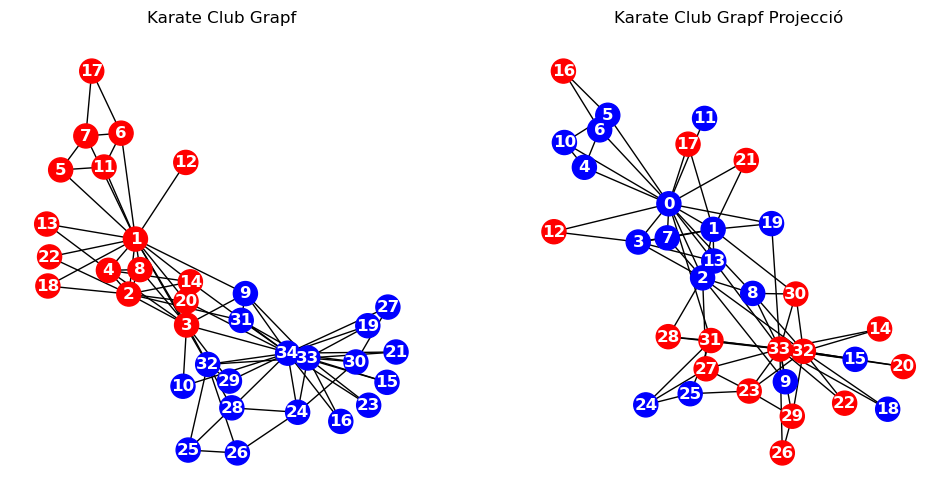

In [165]:
#code to draw the graph and its projection as done above, using the colors provided

plt.figure(figsize=(12, 6))#defineixo la mida del dibuix o dels marges

# Dibuixo el graf original i després el mateix però amb projecció
plt.subplot(1, 2, 1)
pos = nx.spring_layout(karate)
nx.draw(karate, pos, with_labels=True, node_color=karate_colors, font_color='white', font_weight='bold')
plt.title('Karate Club Grapf')#títol del graf

# Dibuixo la projecció
plt.subplot(1, 2, 2)
karate_proj = nx.karate_club_graph()
pos = nx.spring_layout(karate_proj)
nx.draw(karate_proj, pos, with_labels=True, node_color=karate_colors, font_color='white', font_weight='bold')
plt.title('Karate Club Grapf Projecció')#títol del graf

plt.show()#printem el graf de la projecció espectral

<font size="+1" color="blue">En comparativa dels dos grafs, el graf estandard podem veure com les comunitats estan clarament separades de manera que no hi ha molta interacció entre nodes de comunitats diferents, mentres que al graf de la projecció podem veure que els nodes de les dues comunitats estan molt barrejats. Els nodes que aparteixen a la comunitat contrària pot ser degut a que tinguin més interacció, o potser si es sobreposen perfectament es pot deure a que els nodes tenen rols semblants entre ells o tenen veins en comú,</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>